In [1]:
import matplotlib.pyplot as plt
import numpy
import time
import numpy as np
import importlib.util as imp
if imp.find_spec("cupy"): #use cupy for GPU support if available
    import cupy
    import cupy as np
    print ("ok")

from tootorch.dataload import mnist_load
from tootorch.utils import seed_everything, get_samples, ModelTrain
import model_io
import data_io
import render
import statsmodels.api as sm
import torch
# from torchvision import models
from torchvision import models
from torchsummary import summary
from config import *
from tqdm import tqdm
import pickle

In [2]:
import modules


import os, math, collections

import tensorflow as tf
# logger = get_logger(os.path.basename(__file__))
np.random.seed(42)

In [3]:
def unpickle(file):
    
    with open(file, 'rb') as fo:
        
        dict = pickle.load(fo, encoding='bytes')
    
    return dict

In [4]:
def save(dataset, file):
    
    with open(file, 'wb') as fo:
        
        pickle.dump(dataset, fo)


In [5]:
def get_savedir():
        
    savedir = logdir.replace('tf_logs', 'KAR')

    if not os.path.exists(savedir):

        os.makedirs(savedir)

    return savedir

In [6]:
def scale(x):
    
    return x / 127.5 - 1.0

In [7]:
logdir = 'tf_logs/standard/'

In [8]:
Xtest = data_io.read('../data/MNIST/test_images.npy')
Ytest = data_io.read('../data/MNIST/test_labels.npy')
Xtest = np.reshape(Xtest,[Xtest.shape[0],28,28,1])
Xtest = np.pad(Xtest,((0,0),(2,2),(2,2),(0,0)), 'constant', constant_values = (-1.,))

loading np-formatted data from ../data/MNIST/test_images.npy
loading np-formatted data from ../data/MNIST/test_labels.npy


In [9]:
Xtest.shape

(10000, 32, 32, 1)

In [77]:
Xtest = scale(Xtest)

In [78]:
x = Xtest[1:2,...]

In [79]:
occdir = get_savedir() + '{}_{}_{}.pickle'.format('train', 'proposed_method', '0.0')
occdir_y = get_savedir() + '{}_{}_{}_{}.pickle'.format('train', 'proposed_method', '0.0','label')
data_train = unpickle(occdir)
data_train_y = unpickle(occdir_y)
print(occdir)

KAR/standard/train_proposed_method_0.0.pickle


In [80]:
X = np.array(data_train)
Y = np.array(data_train_y)

In [81]:
occdir = get_savedir() + '{}_{}_{}.pickle'.format('train', 'proposed_method', '0.1')
occdir_y = get_savedir() + '{}_{}_{}_{}.pickle'.format('train', 'proposed_method', '0.1','label')
data_train = unpickle(occdir)
data_train_y = unpickle(occdir_y)
print(occdir)

KAR/standard/train_proposed_method_0.1.pickle


In [82]:
X1 = np.array(data_train)
Y1 = np.array(data_train_y)

In [83]:
occdir = get_savedir() + '{}_{}_{}.pickle'.format('train', 'proposed_method', '0.5')
occdir_y = get_savedir() + '{}_{}_{}_{}.pickle'.format('train', 'proposed_method', '0.5','label')
data_train = unpickle(occdir)
data_train_y = unpickle(occdir_y)
print(occdir)

KAR/standard/train_proposed_method_0.5.pickle


In [84]:
XR = np.array(data_train)
YR = np.array(data_train_y)

In [85]:
occdir = get_savedir() + '{}_{}_{}.pickle'.format('train', 'proposed_method', '0.9')
occdir_y = get_savedir() + '{}_{}_{}_{}.pickle'.format('train', 'proposed_method', '0.9','label')
data_train = unpickle(occdir)
data_train_y = unpickle(occdir_y)
print(occdir)

KAR/standard/train_proposed_method_0.9.pickle


In [86]:
XP = np.array(data_train)
YP = np.array(data_train_y)

In [87]:
nn = model_io.read('../models/MNIST/LeNet-5.nn')

loading pickled model from ../models/MNIST/LeNet-5.nn


In [88]:
check = XR[1:1+1,...]
check.min()

-255.0

True Class:      5
Predicted Class: 5 

True Class:      5
Predicted Class: 5 

True Class:      5
Predicted Class: 5 

True Class:      5
Predicted Class: 5 

(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
saving image to  ../test.png


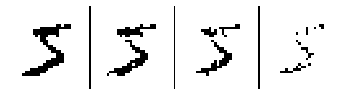

True Class:      0
Predicted Class: 0 

True Class:      0
Predicted Class: 0 

True Class:      0
Predicted Class: 0 

True Class:      0
Predicted Class: 0 

(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
saving image to  ../test.png


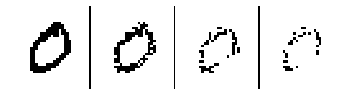

True Class:      4
Predicted Class: 4 

True Class:      4
Predicted Class: 9 

True Class:      4
Predicted Class: 9 

True Class:      4
Predicted Class: 9 

(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
saving image to  ../test.png


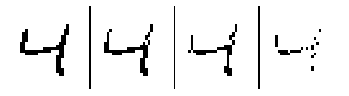

True Class:      1
Predicted Class: 1 

True Class:      1
Predicted Class: 8 

True Class:      1
Predicted Class: 2 

True Class:      1
Predicted Class: 1 

(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
saving image to  ../test.png


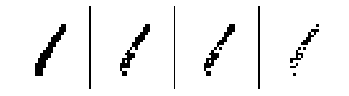

True Class:      9
Predicted Class: 9 

True Class:      9
Predicted Class: 8 

True Class:      9
Predicted Class: 9 

True Class:      9
Predicted Class: 9 

(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
saving image to  ../test.png


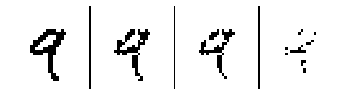

In [58]:
for i in range(5):
    x = X[i:i+1,...]
#     y = Y[i:i+1,...]
    x1 = X1[i:i+1,...]
#     y = Y[i:i+1,...]
    xr = XR[i:i+1,...]
#     yr = YR[i:i+1,...]
    xp = XP[i:i+1,...]
#     yp = YP[i:i+1,...]
    ypred = nn.forward(x)
    print('True Class:     ', np.argmax(Y[i]))
    print('Predicted Class:', np.argmax(ypred),'\n')
    ypred = nn.forward(x1)
    print('True Class:     ', np.argmax(Y1[i]))
    print('Predicted Class:', np.argmax(ypred),'\n')
    ypred = nn.forward(xr)
    print('True Class:     ', np.argmax(YR[i]))
    print('Predicted Class:', np.argmax(ypred),'\n')
    ypred = nn.forward(xp)
    print('True Class:     ', np.argmax(YP[i]))
    print('Predicted Class:', np.argmax(ypred),'\n')
    
    digit = render.digit_to_rgb(x, scaling = 3)
    print(digit.shape)
    digit1 = render.digit_to_rgb(x1, scaling = 3)
    print(digit.shape)
    Rdigit = render.digit_to_rgb(xr, scaling = 3)
    print(Rdigit.shape)
    prdigit = render.digit_to_rgb(xp, scaling = 3)
    print(prdigit.shape)
#     hm = render.hm_to_rgb(r, X = x, scaling = 3, sigma = 2)
    test_image = render.save_image([digit, digit1, Rdigit, prdigit],'../test.png')
    plt.imshow(test_image, interpolation = 'none')
    plt.axis('off')
    plt.show()